In [1]:
!pip install -r requirements.txt

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-win_amd64.whl.metadata (2.4 kB)
  Using cached ydata_profiling-4.17.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7,<3.11; 4.1.0 Requires-Python >=3.7,<3.12; 4.1.1 Requires-Python >=3.7,<3.12; 4.1.2 Requires-Python >=3.7,<3.12; 4.10.0 Requires-Python >=3.7,<3.13; 4.11.0 Requires-Python >=3.7,<3.13; 4.12.0 Requires-Python >=3.7,<3.13; 4.12.1 Requires-Python >=3.7,<3.13; 4.12.2 Requires-Python >=3.7,<3.13; 4.13.0 Requires-Python >=3.7,<3.13; 4.14.0 Requires-Python >=3.7,<3.13; 4.15.0 Requires-Python >=3.7,<3.13; 4.15.1 Requires-Python >=3.7,<3.13; 4.16.0 Requires-Python >=3.7,<3.13; 4.16.1 Requires-Python >=3.7,<3.13; 4.2.0 Requires-Python >=3.7,<3.12; 4.3.0 Requires-Python >=3.7,<3.12; 4.3.1 Requires-Python >=3.7,<3.12; 4.3.2 Requires-Python >=3.7,<3.12; 4.4.0 Requires-Python >=3.7,<3.12; 4.5.0 Requires-Python >=3.7,<3.12; 4.5.1 Requires-Python >=3.7,<3.12; 4.6.0 Requires-Python >=3.7,<3.12; 4.6.1 Requires-Python >=3.7,<3.12; 4.6.2 Requires-Python >=3.7,<3.12; 4.6.3 Requires-Python >=3.7,<3.12; 

### 1. Import Dependencies

In [2]:
import os
from enum import Enum
import seaborn as sns
from pydantic import BaseModel
from dotenv import load_dotenv
import numpy as np # alias
import openai, groq
import pandas as pd # alias

load_dotenv()

False

In [3]:
os.getcwd()

'd:\\MY FILES\\Projects\\Mini-Project-00---EDA-Model-Building\\Python Notebook\\01 Exploratory Data Analysis (EDA)'

### 2. Basic Information

In [4]:
df = pd.read_csv('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


NaN = Not a Number

In [5]:
# Get null values
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# get null value Sums
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3. Handle Missing Values

#### 3.1 Deletion

**axis = 1** -> check each column and drop if atleast 1 null value consists of <br/>
**axis = 0** -> check each row and drop if atleast 1 null value consists of 

#### 3.2 Imputation

The possible ways to do this are:

- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a new type for the missing values.

In [7]:
# In the total charges column, there are some empty strings which are not being recognized as NaN
# We need to convert those to NaN first before we can handle them
# Since 'TotalCharges' is supposed to be numeric, we will replace empty strings
# with NaN and then fill with the mean of the column

# Replace empty strings or whitespaces with NaN first
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', pd.NA, regex=True)

# Convert to numeric, invalid parsing will become NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# # Fill NaNs with 0
# df['TotalCharges'] = df['TotalCharges'].fillna(0)

# # Check
# df['TotalCharges'].isnull().sum()

#### 3.2.1 TotalCharges

In [8]:
mean = df['TotalCharges'].mean()
median = df['TotalCharges'].median()
mean = round(mean, 2)

print(f"Mean | TotalCharges : {mean}")
print(f"Median | TotalCharges : {median}")

Mean | TotalCharges : 2283.3
Median | TotalCharges : 1397.475


<Axes: xlabel='TotalCharges', ylabel='Count'>

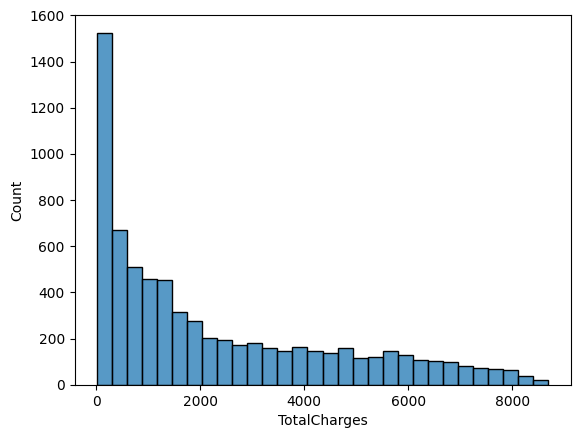

In [9]:
sns.histplot(df['TotalCharges'], bins = 30)

In [10]:
df_impute = df.copy()

In [11]:
df_impute.loc[: , 'TotalCharges'] = df_impute['TotalCharges'].fillna(mean)
df_impute.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df_impute = df_impute.drop(
                             columns=[
                                    'customerID'
                                    ]
                            )
df_impute.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# get null values
df_impute.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df_impute.to_csv(
                'data/processed/ChurnModelling_Missing_Values_Handled.csv', 
                index=False
                )